In [1]:
import pandas as pd

stock_prices_df = pd.read_csv("data/historical_stock_prices.csv", index_col=0)
interactions = pd.read_csv("interactions_final.csv", index_col=0)


C:\Users\ersin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ersin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\ersin\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\ersin\AppData\Local\Temp\ipykernel_9132\1525552485.py:4: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactions = pd.read_csv("interactions_final.csv", index_col=0)


In [2]:
stock_prices_df = stock_prices_df.reset_index()
stock_prices_df.head()

,ticker,open,close,adj_close,low,high,volume,date
0,AHH,11.50,11.58,8.493155,11.25,11.68,4633900,2013-05-08
1,AHH,11.66,11.55,8.471151,11.50,11.66,275800,2013-05-09
2,AHH,11.55,11.60,8.507822,11.50,11.60,277100,2013-05-10
3,AHH,11.63,11.65,8.544494,11.55,11.65,147400,2013-05-13
4,AHH,11.60,11.53,8.456484,11.50,11.60,184100,2013-05-14


In [5]:
print(stock_prices_df.describe())

               open         close     adj_close           low          high  \
count  2.097389e+07  2.097389e+07  2.097389e+07  2.097389e+07  2.097389e+07   
mean   7.605823e+01  7.611403e+01  1.481184e+14  7.422064e+01  7.803857e+01   
std    2.849639e+03  2.870159e+03  4.574674e+16  2.746059e+03  2.997937e+03   
min    4.000000e-04  2.000000e-04  2.282650e-09  1.000000e-04  4.000000e-04   
25%    7.500000e+00  7.500000e+00  4.620000e+00  7.360000e+00  7.630000e+00   
50%    1.545000e+01  1.545000e+01  1.138199e+01  1.524000e+01  1.566000e+01   
75%    2.972000e+01  2.972000e+01  2.472046e+01  2.928000e+01  3.010000e+01   
max    2.034000e+06  1.779750e+06  1.894962e+19  1.440000e+06  2.070000e+06   

             volume  
count  2.097389e+07  
mean   1.227043e+06  
std    1.316686e+07  
min    1.000000e+00  
25%    2.210000e+04  
50%    1.260000e+05  
75%    6.074000e+05  
max    4.483504e+09  


In [6]:
stock_prices_df.shape

(20973889, 8)

In [10]:
stock_prices_df[stock_prices_df["ticker"] == "BSC"]

,ticker,open,close,adj_close,low,high,volume,date


In [2]:
unique_tickers = interactions["ticker"].unique().tolist()
quarter_dates  = interactions["rdate"].unique().tolist()

In [3]:
quarter_dates.shape

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
unique_tickers[0:5], len(unique_tickers)

In [ ]:
filtered_df = stock_prices_df[stock_prices_df.index.isin(unique_tickers)]
filtered_df.shape

In [ ]:
filtered_df.head()

In [48]:
# Convert the quarter_dates to datetime objects

quarter_dates = pd.to_datetime(quarter_dates)
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

C:\Users\ersin\AppData\Local\Temp\ipykernel_25088\4082540957.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = pd.to_datetime(filtered_df['date'])


Before filtering them, first calculate volatility (to reduce nans)

    Calculate daily returns.
    Calculate daily volatility as the standard deviation of daily returns.
    Aggregate the daily volatility into quarterly volatility.

Convert the quarter_dates to datetime objects

quarter_dates = pd.to_datetime(quarter_dates) filtered_df['date'] = pd.to_datetime(filtered_df['date'])The adjusted close price accounts for corporate actions such as stock splits and dividends, distributions and rights offerings (here)

Stock splits in particular would give the illusion of significant volatility and impact your estimates with outliers that are not due to market activity. Therefore, I would suggest using the adjusted close prices.


In [49]:
filtered_df['daily_return'] = filtered_df.groupby('ticker')['adj_close'].pct_change()
filtered_df = filtered_df.reset_index()
# Calculate daily volatility for each ticker and reset the index so it can be assigned back
daily_volatility = filtered_df.groupby('ticker')['daily_return'].expanding().std().reset_index(level=0, drop=True)

# Assign the daily volatility back to the filtered_df
filtered_df['daily_volatility'] = daily_volatility

C:\Users\ersin\AppData\Local\Temp\ipykernel_25088\1593501394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['daily_return'] = filtered_df.groupby('ticker')['adj_close'].pct_change()


,ticker,open,close,adj_close,low,high,volume,date,daily_return,daily_volatility
0,AHH,11.50,11.58,8.493155,11.25,11.68,4633900,2013-05-08,NaN,NaN
1,AHH,11.66,11.55,8.471151,11.50,11.66,275800,2013-05-09,-0.002591,NaN
2,AHH,11.55,11.60,8.507822,11.50,11.60,277100,2013-05-10,0.004329,0.004893
3,AHH,11.63,11.65,8.544494,11.55,11.65,147400,2013-05-13,0.004310,0.003990
4,AHH,11.60,11.53,8.456484,11.50,11.60,184100,2013-05-14,-0.010300,0.006967


In [51]:
# remove records before 1999-03-30 and after 2017-09-30

start_date = '1999-03-30'
end_date = '2017-09-30'

start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

filtered_df = filtered_df[(filtered_df['date'] >= start_date) & (filtered_df['date'] <= end_date)]

In [52]:
filtered_df.head()

,ticker,open,close,adj_close,low,high,volume,date,daily_return,daily_volatility
0,AHH,11.50,11.58,8.493155,11.25,11.68,4633900,2013-05-08,NaN,NaN
1,AHH,11.66,11.55,8.471151,11.50,11.66,275800,2013-05-09,-0.002591,NaN
2,AHH,11.55,11.60,8.507822,11.50,11.60,277100,2013-05-10,0.004329,0.004893
3,AHH,11.63,11.65,8.544494,11.55,11.65,147400,2013-05-13,0.004310,0.003990
4,AHH,11.60,11.53,8.456484,11.50,11.60,184100,2013-05-14,-0.010300,0.006967


In [54]:
quarter_dates.shape

(74,)

In [55]:
filtered_df = filtered_df.sort_values(by='date')

quarter_dates = sorted(quarter_dates)

In [56]:
# Function to determine the quarter for a given date
def assign_quarter(date):
    # Assign to the first quarter by default
    current_quarter = quarter_dates[0]
    for quarter_end in quarter_dates:
        if date <= quarter_end:
            current_quarter = quarter_end
            break
    return current_quarter

# Apply the function to the 'date' column to create a new 'quarter' column
filtered_df['quarter'] = filtered_df['date'].apply(assign_quarter)

In [57]:
quarterly_volatility = filtered_df.groupby(['ticker', 'quarter'])['daily_return'].std().reset_index()
quarterly_volatility.rename(columns={'daily_return': 'quarterly_volatility'}, inplace=True)
quarterly_volatility.head()

,ticker,quarter,quarterly_volatility
0,A,1999-12-31,0.062768
1,A,2000-03-31,0.079432
2,A,2000-06-30,0.072011
3,A,2000-09-30,0.058517
4,A,2000-12-31,0.052617


In [58]:
quarterly_volume = filtered_df.groupby(['ticker', 'quarter'])['volume'].sum().reset_index()
quarterly_volume.rename(columns={'volume': 'quarterly_volume'}, inplace=True)
quarterly_volume.head()

,ticker,quarter,quarterly_volume
0,A,1999-12-31,172198500
1,A,2000-03-31,135495200
2,A,2000-06-30,333488000
3,A,2000-09-30,350473500
4,A,2000-12-31,248571600


In [59]:
merged_df = pd.merge(quarterly_volatility, quarterly_volume, on=['ticker', 'quarter'])


In [60]:
merged_df.head()

,ticker,quarter,quarterly_volatility,quarterly_volume
0,A,1999-12-31,0.062768,172198500
1,A,2000-03-31,0.079432,135495200
2,A,2000-06-30,0.072011,333488000
3,A,2000-09-30,0.058517,350473500
4,A,2000-12-31,0.052617,248571600


In [62]:
dfa = merged_df[merged_df["ticker"]=="AAPL"]
dfa.shape

(74, 4)

## QUARTERLY PRICE DE EKLE

In [63]:
quarterly_price = filtered_df.groupby(['ticker', 'quarter'])['close'].mean().reset_index()
quarterly_price.rename(columns={'price': 'quarterly_price'}, inplace=True)
quarterly_price.head()

,ticker,quarter,close
0,A,1999-12-31,34.580651
1,A,2000-03-31,66.964817
2,A,2000-06-30,57.967057
3,A,2000-09-30,39.044759
4,A,2000-12-31,35.531911


In [64]:
merged_df = pd.merge(merged_df, quarterly_price, on=['ticker', 'quarter'])


In [65]:
merged_df.rename(columns={'close': 'quarterly_price'}, inplace=True)
merged_df.head()

,ticker,quarter,quarterly_volatility,quarterly_volume,quarterly_price
0,A,1999-12-31,0.062768,172198500,34.580651
1,A,2000-03-31,0.079432,135495200,66.964817
2,A,2000-06-30,0.072011,333488000,57.967057
3,A,2000-09-30,0.058517,350473500,39.044759
4,A,2000-12-31,0.052617,248571600,35.531911


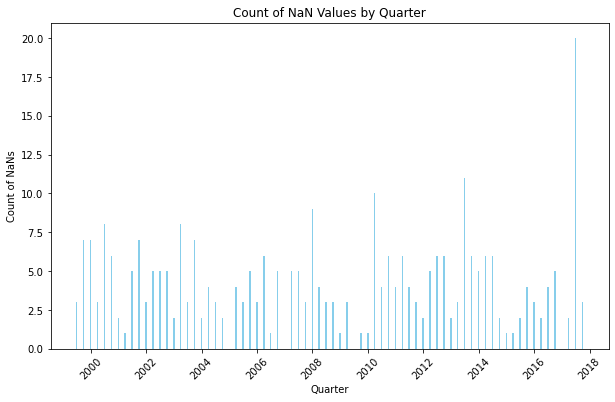

In [66]:
import matplotlib.pyplot as plt


# Count the number of NaNs per quarter
nan_counts = merged_df['quarterly_volatility'].isna().groupby(merged_df['quarter']).sum().reset_index(name='nan_count')

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(nan_counts['quarter'], nan_counts['nan_count'], color='skyblue', width=20)
plt.xlabel('Quarter')
plt.ylabel('Count of NaNs')
plt.title('Count of NaN Values by Quarter')
plt.xticks(rotation=45)  # Rotate the x labels to show them better
plt.show()

In [67]:

# Assuming 'df' is your DataFrame
percentage_nans = merged_df.isna().mean().mean() * 100

print(f"Percentage of NaN values in the DataFrame: {percentage_nans:.2f}%")

Percentage of NaN values in the DataFrame: 0.03%


### Lets also flag historically be in SP500 companies from "Trading Evolved" by Andreas F. Clenow data/index_members/sp500

In [68]:
import requests
import pandas as pd
from io import StringIO

url = "https://raw.githubusercontent.com/fja05680/sp500/master/S%26P%20500%20Historical%20Components%20%26%20Changes(08-01-2023).csv"
response = requests.get(url)
data = StringIO(response.text)
df = pd.read_csv(data)

def get_common_tickers(df):
    # Step 1: Filter rows between 1999 to 2017
    filtered_df = df[(df['date'] >= '1999-03-30') & (df['date'] <= '2017-09-30')]
    
    # Step 2: Convert each row of tickers into a set
    ticker_sets = filtered_df['tickers'].str.split(',').apply(set)
    
    # Find common tickers by taking intersection of all sets
    common_tickers = set.intersection(*ticker_sets)
    
    return list(common_tickers)

common_symbols = get_common_tickers(df)
merged_df['is_sp500'] = merged_df['ticker'].apply(lambda x: x in common_symbols)

In [69]:
merged_df.head()

,ticker,quarter,quarterly_volatility,quarterly_volume,quarterly_price,is_sp500
0,A,1999-12-31,0.062768,172198500,34.580651,False
1,A,2000-03-31,0.079432,135495200,66.964817,False
2,A,2000-06-30,0.072011,333488000,57.967057,False
3,A,2000-09-30,0.058517,350473500,39.044759,False
4,A,2000-12-31,0.052617,248571600,35.531911,False


In [70]:
import pandas as pd

# Assuming df and merged_df are already defined

# Convert the 'date' column to datetime in df
df['date'] = pd.to_datetime(df['date'])

# Split the 'tickers' string into a list of tickers
df['tickers'] = df['tickers'].str.split(',')

# Explode the dataframe to have one ticker per row
df_exploded = df.explode('tickers')

# Function to determine the quarter for a given date
def assign_quarter(date):
    # Assign to the first quarter by default
    current_quarter = quarter_dates[0]
    for quarter_end in quarter_dates:
        if date <= quarter_end:
            current_quarter = quarter_end
            break
    return current_quarter

# Apply the function to the 'date' column to create a new 'quarter' column
df_exploded['quarter'] = df_exploded['date'].apply(assign_quarter)

In [71]:
df_exploded.drop(columns=['date'], inplace=True)
df_exploded.rename(columns={'tickers': 'ticker'}, inplace=True)

# Create a unique identifier in both DataFrames
merged_df['unique_id'] = merged_df['ticker'] + '_' + merged_df['quarter'].astype(str)
df_exploded['unique_id'] = df_exploded['ticker'] + '_' + df_exploded['quarter'].astype(str)

# Use isin to create the was_in_sp500 column
merged_df['was_in_sp500'] = merged_df['unique_id'].isin(df_exploded['unique_id'])

merged_df.drop(columns=['unique_id','is_sp500'], inplace=True)


In [72]:
merged_df.head()

,ticker,quarter,quarterly_volatility,quarterly_volume,quarterly_price,was_in_sp500
0,A,1999-12-31,0.062768,172198500,34.580651,False
1,A,2000-03-31,0.079432,135495200,66.964817,False
2,A,2000-06-30,0.072011,333488000,57.967057,True
3,A,2000-09-30,0.058517,350473500,39.044759,True
4,A,2000-12-31,0.052617,248571600,35.531911,True


In [73]:
merged_df.shape

(175893, 6)

In [74]:
merged_df.to_csv('prices_final.csv')